Identify the data needed within the Zillow csv

In [15]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts






In [16]:
#pull necessary csv "../Resources/Median House Price.csv"
csv_path = "Resources/Median House Price.csv"
house_df = pd.read_csv(csv_path)
house_df
#import csv as dataframe

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,102001,0,United States,Country,NaN,107630.0,107657.0,107707.0,107834.0,107977.0,...,247737,248625,249639,250802,252042,253216,254423,255872,257736,259906
1,394913,1,"New York, NY",Msa,NY,187842.0,187403.0,187125.0,186592.0,186274.0,...,479999,480758,481745,482804,484104,485517,487279,489670,492875,497090
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,183929.0,184185.0,184205.0,184312.0,184286.0,...,671796,675183,680320,685503,689705,691229,692332,696613,703740,711361
3,394463,3,"Chicago, IL",Msa,IL,164647.0,164345.0,163946.0,163493.0,162886.0,...,245373,245631,246017,246628,247155,247719,248421,249650,251298,253512
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,114406.0,114471.0,114634.0,114962.0,115314.0,...,260294,260750,261428,262440,263584,264699,265992,267485,269183,270907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,75408,75568,75681,75786,75968,76213,76503,76738,76975,77216
910,753874,930,"Craig, CO",Msa,CO,60501.0,60725.0,60961.0,61420.0,61747.0,...,187489,187062,186934,186942,187037,187109,187262,187332,187393,187430
911,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,124046,125836,127175,128373,128879,129605,130574,131262,131311,130703
912,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,69702,69630,69495,69361,69277,69276,69229,69236,69248,69306


In [17]:
#clean dataframe, only need years 2009-2019, state name

house_09_to_2020_df = house_df[["StateName","1/31/2009","2/28/2009","3/31/2009","4/30/2009","5/31/2009","6/30/2009","7/31/2009","8/31/2009","9/30/2009","10/31/2009","11/30/2009","12/31/2009",
                            "1/31/2010","2/28/2010","3/31/2010","4/30/2010","5/31/2010","6/30/2010","7/31/2010","8/31/2010","9/30/2010","10/31/2010","11/30/2010","12/31/2010",
                            "1/31/2011","2/28/2011","3/31/2011","4/30/2011","5/31/2011","6/30/2011","7/31/2011","8/31/2011","9/30/2011","10/31/2011","11/30/2011","12/31/2011",
                            "1/31/2012","2/29/2012","3/31/2012","4/30/2012","5/31/2012","6/30/2012","7/31/2012","8/31/2012","9/30/2012","10/31/2012","11/30/2012","12/31/2012",
                            "1/31/2013","2/28/2013","3/31/2013","4/30/2013","5/31/2013","6/30/2013","7/31/2013","8/31/2013","9/30/2013","10/31/2013","11/30/2013","12/31/2013",
                            "1/31/2014","2/28/2014","3/31/2014","4/30/2014","5/31/2014","6/30/2014","7/31/2014","8/31/2014","9/30/2014","10/31/2014","11/30/2014","12/31/2014",
                            "1/31/2015","2/28/2015","3/31/2015","4/30/2015","5/31/2015","6/30/2015","7/31/2015","8/31/2015","9/30/2015","10/31/2015","11/30/2015","12/31/2015",
                            "1/31/2016","2/29/2016","3/31/2016","4/30/2016","5/31/2016","6/30/2016","7/31/2016","8/31/2016","9/30/2016","10/31/2016","11/30/2016","12/31/2016",
                            "1/31/2017","2/28/2017","3/31/2017","4/30/2017","5/31/2017","6/30/2017","7/31/2017","8/31/2017","9/30/2017","10/31/2017","11/30/2017","12/31/2017",
                            "1/31/2018","2/28/2018","3/31/2018","4/30/2018","5/31/2018","6/30/2018","7/31/2018","8/31/2018","9/30/2018","10/31/2018","11/30/2018","12/31/2018",
                            "1/31/2019","2/28/2019","3/31/2019","4/30/2019","5/31/2019","6/30/2019","7/31/2019","8/31/2019","9/30/2019","10/31/2019","11/30/2019","12/31/2019"]]

#clean out NaN values (df.dropna(how='any'))
clean_house_df = house_09_to_2020_df.dropna(how="any")

#print dataframe
clean_house_df

,StateName,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,...,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019
1,NY,427033.0,423196.0,419570.0,416142.0,413528.0,410668.0,408160.0,405503.0,403720.0,...,478130,478733,479568,480426,481178,481390,480752,480060,479577,479999
2,CA,437562.0,433213.0,429993.0,426778.0,423950.0,421358.0,420187.0,420215.0,421197.0,...,655266,654579,658017,662376,664249,664279,665085,667400,669151,671796
3,IL,242334.0,239308.0,235943.0,233874.0,230841.0,228761.0,226923.0,225491.0,223448.0,...,244071,244754,245443,246025,246377,246414,245994,245642,245289,245373
4,TX,154006.0,154339.0,154781.0,154868.0,154818.0,154580.0,154501.0,154395.0,154547.0,...,256260,256605,257256,257749,258250,258636,259309,259667,260082,260294
5,PA,238208.0,237023.0,236082.0,235217.0,234282.0,233330.0,232428.0,231842.0,231470.0,...,246850,247525,248434,249027,249787,250237,250510,250831,251227,251872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,TX,61688.0,61149.0,61020.0,60955.0,60598.0,60100.0,59400.0,58999.0,58642.0,...,90208,90495,90552,90642,90673,91003,91146,91310,91194,91027
909,TX,44748.0,44749.0,44764.0,44707.0,44718.0,44495.0,44269.0,44018.0,43959.0,...,72109,72634,73063,73455,73822,74199,74523,74906,75174,75408
910,CO,139820.0,139649.0,139471.0,139302.0,139122.0,138893.0,138661.0,138286.0,137924.0,...,187079,187034,187104,187426,187705,187914,187955,188108,187868,187489
912,TX,50256.0,50244.0,50250.0,50218.0,50187.0,50122.0,50058.0,49938.0,49705.0,...,69232,69399,69474,69571,69654,69735,69677,69674,69639,69702


In [18]:
#groupby State, calculate the average by state
house_by_state_df = clean_house_df.groupby(['StateName'])
avg_housing_by_year_df = house_by_state_df.mean()
avg_housing_by_year_df = avg_housing_by_year_df.round(2)

avg_housing_by_year_df

,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,...,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019
StateName,,,,,,,,,,,,,,,,,,,,,
AK,266718.50,266578.50,266538.00,266608.75,266188.50,265797.25,265269.25,264715.50,264346.25,263883.00,...,306614.00,309068.75,310306.75,311492.00,312275.75,313221.00,313703.00,313918.00,314210.50,314695.75
AL,119441.15,119130.65,118790.75,118396.95,117862.35,117278.85,116644.05,116097.75,115549.65,115064.75,...,125458.35,125938.20,126378.35,126813.80,127269.05,127682.50,128024.05,128394.75,128894.80,129451.40
AR,90394.05,90106.32,89753.37,89408.95,89135.68,88964.68,88768.26,88482.11,88180.37,87888.05,...,104827.84,105174.16,105592.84,105994.89,106340.79,106651.26,106956.16,107298.89,107518.58,107722.74
AZ,188815.00,186882.50,184801.10,181958.90,178939.60,176372.30,174000.60,171516.00,169079.20,167036.00,...,227209.70,227956.80,229065.20,230401.90,231840.40,232927.20,233639.80,234418.00,235134.20,236309.70
CA,297412.82,293679.82,289793.64,286248.67,283193.94,281002.64,279562.94,277955.55,276514.64,275767.82,...,443911.61,444609.85,445798.64,447404.48,447734.58,447392.45,447145.27,447730.82,448571.15,449766.21
CO,260109.50,259306.19,258383.62,257457.25,256806.31,256420.56,255995.69,255315.06,254208.38,253225.88,...,378722.94,380075.44,381246.00,382465.88,383666.06,384632.12,385300.62,385649.06,385892.38,386435.31
CT,307567.80,305848.20,303683.20,301294.00,298279.40,295797.40,293589.60,292604.20,291396.00,290877.40,...,274077.80,275083.20,276015.20,276154.60,275891.80,275156.80,274637.20,274372.40,274196.80,274359.60
DC,352985.00,348427.00,344218.00,340797.00,338586.00,337220.00,336464.00,335587.00,334582.00,334078.00,...,425066.00,425973.00,427054.00,428033.00,428503.00,429162.00,429968.00,431383.00,432739.00,433952.00
DE,249384.00,247632.00,246491.00,244821.50,243019.00,241136.00,239969.00,239057.00,238087.00,236646.50,...,239529.00,239890.00,240851.50,241946.50,242742.00,243601.50,244164.50,244523.00,244563.50,244920.00


In [19]:
#calculate the average housing price over 10 years
avg_housing_by_year_df['Average Price over 10 years'] = avg_housing_by_year_df.mean(axis=1)
avg_housing_over_10_df = avg_housing_by_year_df['Average Price over 10 years']
avg_housing_over_10_df = avg_housing_over_10_df.round(2)
avg_housing_over_10_df = avg_housing_over_10_df.to_frame()

avg_housing_over_10_df

,Average Price over 10 years
StateName,
AK,280860.70
AL,112776.28
AR,92401.13
AZ,179990.22
CA,341124.28
CO,292042.10
CT,267778.42
DC,372011.61
DE,221661.31


In [20]:
#calculate the national average to use as hline
natl_avg_price = avg_housing_over_10_df['Average Price over 10 years'].mean().round(2)
natl_avg_price

183580.99

In [21]:
#identify 5 highest average housing price (sort)
highest_house_price_df = avg_housing_over_10_df.sort_values(['Average Price over 10 years'], ascending=False)
top_10_df = highest_house_price_df.head(10)
print(top_10_df)
#identify 5 lowest average housing price
lowest_house_price_df = avg_housing_over_10_df.sort_values(['Average Price over 10 years'], ascending=True)
bottom_10_df = lowest_house_price_df.head(10)
print(bottom_10_df)

           Average Price over 10 years
StateName                             
HI                           552548.98
DC                           372011.61
CA                           341124.28
MA                           334238.99
CO                           292042.10
AK                           280860.70
CT                           267778.42
RI                           265241.89
UT                           261481.70
WY                           241232.10
           Average Price over 10 years
StateName                             
WV                            87340.04
OK                            88300.31
AR                            92401.13
IL                           101904.24
OH                           103938.35
MS                           105650.99
KY                           105767.58
IN                           107720.48
GA                           107993.43
KS                           110520.21


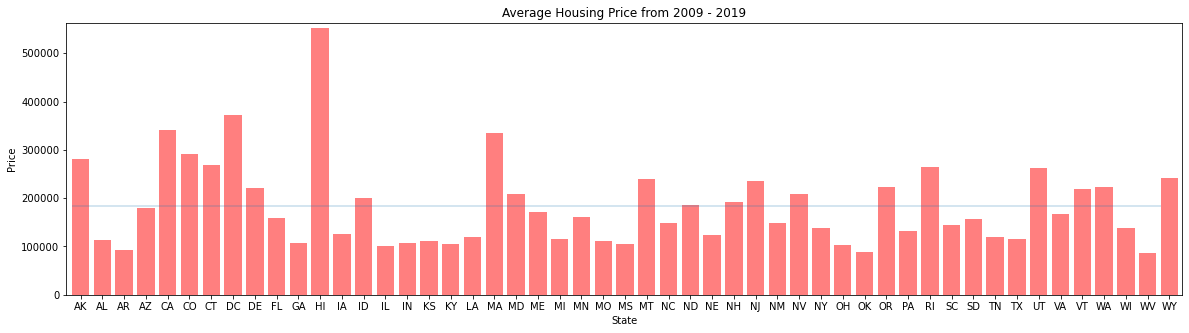

In [27]:
#Visualizations

#bar graph, all data, hline=national aveage

x_axis = np.arange(len(avg_housing_over_10_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,5))
plt.bar(x_axis, avg_housing_over_10_df["Average Price over 10 years"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, avg_housing_over_10_df.index, rotation="horizontal")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(avg_housing_over_10_df["Average Price over 10 years"])+10000)
plt.title("Average Housing Price from 2009 - 2019")
plt.xlabel("State")
plt.ylabel("Price")
plt.hlines(natl_avg_price, 0, 50, alpha = 0.25)
plt.savefig("Images_housing/national_housing_average.png", bbox_inches='tight')
plt.show()


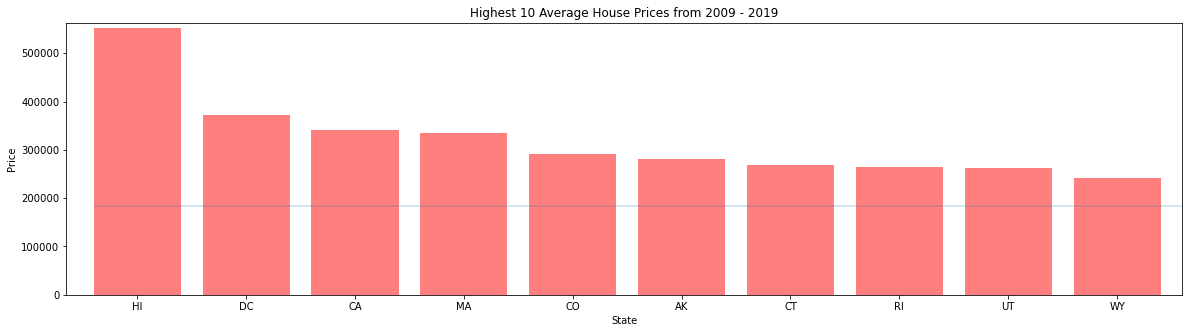

In [26]:
#bar graph, top 10
x_axis = np.arange(len(top_10_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,5))
plt.bar(x_axis, top_10_df["Average Price over 10 years"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, top_10_df.index, rotation="horizontal")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(top_10_df["Average Price over 10 years"])+10000)
plt.title("Highest 10 Average House Prices from 2009 - 2019")
plt.xlabel("State")
plt.ylabel("Price")
plt.hlines(natl_avg_price, 0, 50, alpha = 0.25)
plt.savefig("Images_housing/top_10_housing_average.png", bbox_inches='tight')
plt.show()

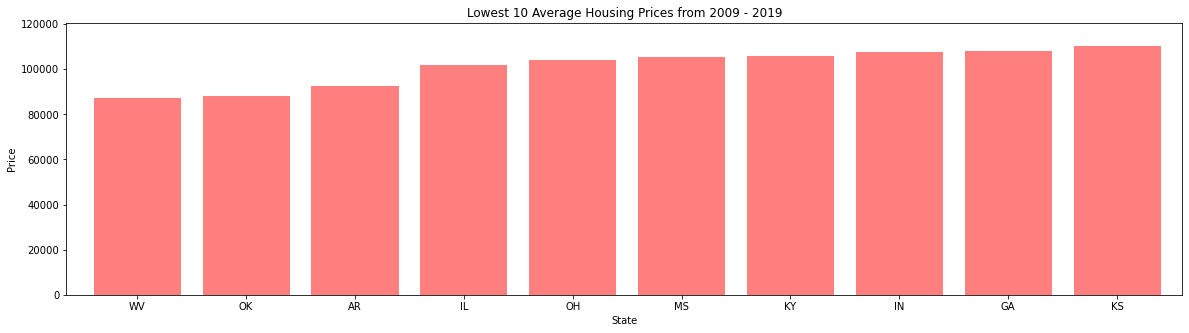

In [25]:
#bar graph, bottom 10
x_axis = np.arange(len(bottom_10_df))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,5))
plt.bar(x_axis, bottom_10_df["Average Price over 10 years"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, bottom_10_df.index, rotation="horizontal")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(bottom_10_df["Average Price over 10 years"])+10000)
plt.title("Lowest 10 Average Housing Prices from 2009 - 2019")
plt.xlabel("State")
plt.ylabel("Price")
plt.savefig("Images_housing/bottom_10_housing_average.png", bbox_inches='tight')
plt.show()